#                             Prediction using Supervised Machine Learning

###### Description


In [41]:
#Import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [70]:
#Read dataset from URL
URL = "http://bit.ly/w-data"
df = pd.read_csv(URL)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Exploratory Data Analysis

In [71]:
df.describe()                                                                           #Descriptive Analysis

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [44]:
df.shape

(25, 2)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [46]:
 df.isnull().value_counts()

Hours  Scores
False  False     25
dtype: int64

There is no null values present in the dataset on the basis of analysis done above

### Visualization

Plot the graph to see the distribution of data points

Text(0, 0.5, 'Scores')

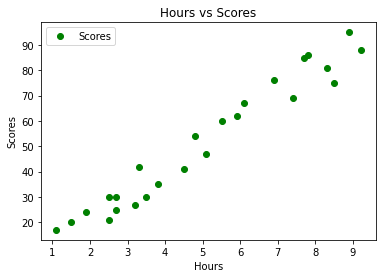

In [47]:
# Plotting the distribution of scores
df.plot(x='Hours',y='Scores', color='g', style ='o')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')

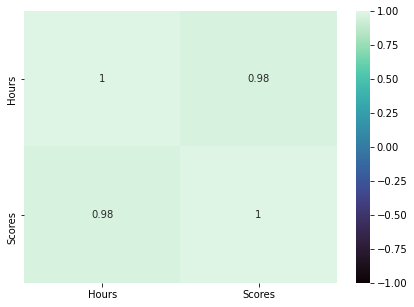

In [48]:
df_corr = df.corr()
plt.figure(figsize=(7,5))
sns.heatmap(df_corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()

### Preparing data

In [72]:
#Splitting data into x - independent features and y - dependent feature
x = df.drop('Scores',axis=1).values
x = x.reshape(-1,1)
y = df[['Scores']].values
y = y.reshape(-1,1)

In [73]:
#Splitting data into train and test data by using Scikit-Learn's built-in train_test_split() method: 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=0) 

### Modelling

In [79]:
#Building Linear Regression model
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

#Performing cross validation for better performance
from sklearn.model_selection import cross_val_score
mse = cross_val_score(linear_reg,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mse_mean = np.mean(mse)
mse_mean

-40.93843836632023

In [80]:
linear_reg.fit(X_train,y_train)

LinearRegression()

In [53]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
params = {'alpha':(1e-15,1e-10,1e-8,1e-5,10,20,5,3,15,40)}
from sklearn.model_selection import GridSearchCV
ridge_reg = GridSearchCV(ridge_reg,params,scoring='neg_mean_squared_error',cv=5)
ridge_reg.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': (1e-15, 1e-10, 1e-08, 1e-05, 10, 20, 5, 3, 15,
                                   40)},
             scoring='neg_mean_squared_error')

In [78]:
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

{'alpha': 1e-05}
-40.938438303158655


In [75]:
#Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
params = {'alpha':(1e-15,1e-10,1e-8,1e-5,10,20,5,3,15,40)}
from sklearn.model_selection import GridSearchCV
lasso_reg = GridSearchCV(lasso_reg,params,scoring='neg_mean_squared_error',cv=5)
lasso_reg.fit(X_train,y_train)

C:\Users\daksh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 169.49686637389902, tolerance: 0.7603230769230769
  model = cd_fast.enet_coordinate_descent(
C:\Users\daksh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173.42660035826123, tolerance: 0.810923076923077
  model = cd_fast.enet_coordinate_descent(
C:\Users\daksh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.225469478653622, tolerance: 0.8733500000000001
  model = cd_fast.enet_coordinate_descent(
C:\Users\daksh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': (1e-15, 1e-10, 1e-08, 1e-05, 10, 20, 5, 3, 15,
                                   40)},
             scoring='neg_mean_squared_error')

In [76]:
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

{'alpha': 1e-15}
-40.93843836632016


Among the three algorithms, Linear regression model is giving minimum mean squared error

## Graphical representation of best fit line

Text(0, 0.5, 'Scores')

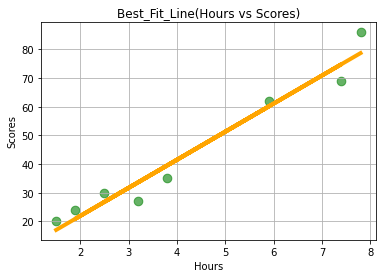

In [81]:
# Plotting the regression line
line = linear_reg.coef_*X_test+linear_reg.intercept_

# Plotting for the train data
plt.scatter(X_test,y_test,alpha=0.6,color='g',s=75)
plt.plot(X_test,line,color='orange',linewidth=4)
plt.grid()
plt.title('Best_Fit_Line(Hours vs Scores)')
plt.xlabel('Hours')
plt.ylabel('Scores')

## Predictive Analysis

Now we trained the model using training dataset and its time for prediction

In [82]:
y_pred = linear_reg.predict(X_test)
#print(X_test)
print(y_test)

[[20]
 [27]
 [69]
 [30]
 [62]
 [35]
 [24]
 [86]]


In [56]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame(y_test) 
df1['Actual'] = y_test
df1['predicted']=y_pred
df1 = df1.drop(0,axis=1)
df1

,Actual,predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


## Performance metrix of the model

In [83]:
from sklearn.metrics import r2_score
r2score = r2_score(y_test,y_pred)
print(r2score)

0.9568211104435257


###### As per above performance metrix method, the Linear Regression model is performing good with 95% performance

### Predicted Score if a student studies  for 9.25 hrs/day

In [96]:
Hours = 9.25
prediction = linear_reg.predict([[Hours]])
prediction                            


array([[92.91505723]])

# ..........................END......................................................